In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sn


In [39]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

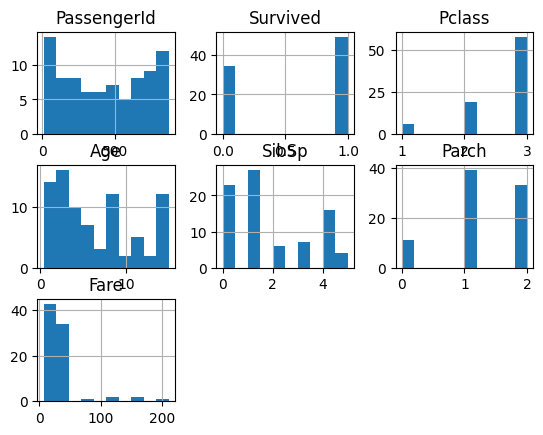

In [40]:
children = df[df['Age'] < 16]
children.shape
children.hist()


[[<Axes: title={'center': 'PassengerId'}>
  <Axes: title={'center': 'Survived'}> <Axes: title={'center': 'Pclass'}>]
 [<Axes: title={'center': 'Age'}> <Axes: title={'center': 'SibSp'}>
  <Axes: title={'center': 'Parch'}>]
 [<Axes: title={'center': 'Fare'}> <Axes: > <Axes: >]]
     PassengerId  Survived  Pclass                                     Name   
7              8         0       3           Palsson, Master. Gosta Leonard  \
14            15         0       3     Vestrom, Miss. Hulda Amanda Adolfina   
16            17         0       3                     Rice, Master. Eugene   
24            25         0       3            Palsson, Miss. Torborg Danira   
50            51         0       3               Panula, Master. Juha Niilo   
59            60         0       3       Goodwin, Master. William Frederick   
63            64         0       3                    Skoog, Master. Harald   
111          112         0       3                     Zabour, Miss. Hileni   
119         

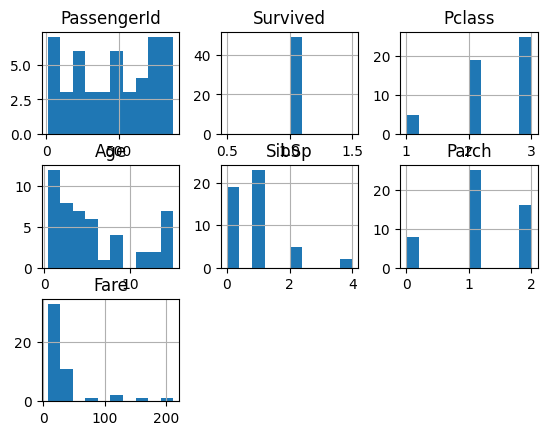

In [41]:
living_children = df[(df['Age'] < 16) & (df['Survived'] == 1)]
print(living_children.hist())
not_surviving_children = df[(df['Age'] < 16) & (df['Survived'] == 0)]
print(not_surviving_children)

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

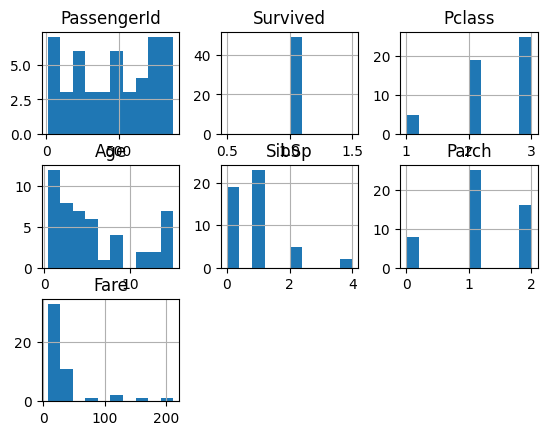

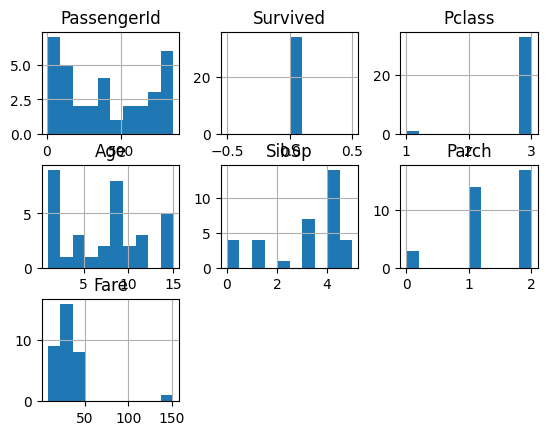

In [42]:
living_children.hist()

not_surviving_children.hist()

In [43]:
women_and_children = df[(df['Sex'] == "female") | (df['Age'] < 16)]
w_a_c_survival_rate = women_and_children['Survived'].value_counts(normalize=True) * 100
w_a_c_survival_rate
adult_men = df[(df['Sex'].str.match('male')) & (df['Age'] > 16)]
a_m_survival_rate = adult_men['Survived'].value_counts(normalize=True) * 100
a_m_survival_rate

Survived
0    82.338308
1    17.661692
Name: proportion, dtype: float64

In [44]:
children = df[df['Age'] < 16]
surviving_children = df[(df['Age'] < 16) & (df['Survived'] == 1)]
child_chance_of_survival = surviving_children.shape[0] / children.shape[0]
format(child_chance_of_survival, ".0%")

'59%'

In [45]:
women = df[(df['Sex'] == 'female') & (df['Age'] > 16)]
surviving_women = df[(df['Sex'] == 'female') & (df['Age'] > 16) & (df['Survived'] == 1)]
women_chance_of_survival = surviving_women.shape[0] / women.shape[0]
format(women_chance_of_survival, ".0%")

'77%'

In [46]:
men = df[(df['Sex'] == 'male') & (df['Age'] > 16)]
surviving_men = df[(df['Sex'] == 'male') & (df['Age'] > 16) & (df['Survived'] == 1)]
men_chance_of_survival = surviving_men.shape[0] / men.shape[0]
format(men_chance_of_survival, ".0%")

'18%'

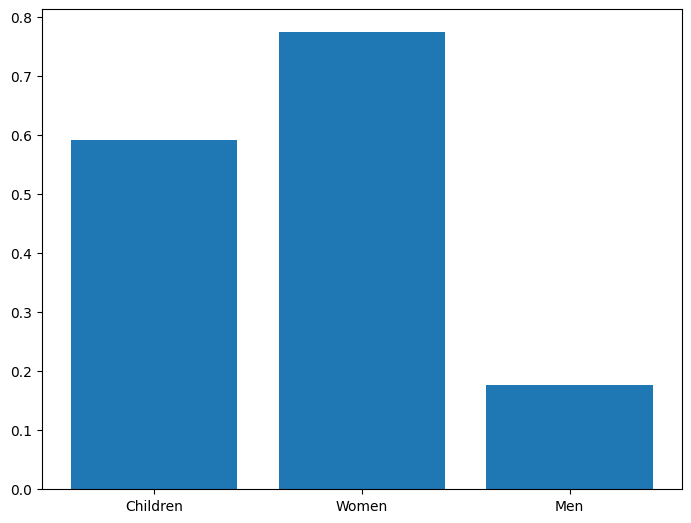

In [47]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = ["Children", "Women", "Men"]
data = [child_chance_of_survival, women_chance_of_survival, men_chance_of_survival]
ax.bar(x_axis, data)
plt.show()

In [48]:
surviving_men = df[(df['Sex'] == "male") & (df['Age'] > 16) & (df['Survived'] == 1)]
print(surviving_men.describe())
dead_men = df[(df['Sex'] == "male") & (df['Age'] > 16) & (df['Survived'] == 0)]
print(dead_men.describe())


       PassengerId  Survived     Pclass        Age      SibSp      Parch   
count    71.000000      71.0  71.000000  71.000000  71.000000  71.000000  \
mean    485.267606       1.0   1.873239  34.323944   0.267606   0.126761   
std     222.128789       0.0   0.955130  11.798032   0.476827   0.411602   
min      22.000000       1.0   1.000000  17.000000   0.000000   0.000000   
25%     288.000000       1.0   1.000000  26.500000   0.000000   0.000000   
50%     513.000000       1.0   1.000000  32.000000   0.000000   0.000000   
75%     654.500000       1.0   3.000000  41.000000   0.500000   0.000000   
max     890.000000       1.0   3.000000  80.000000   2.000000   2.000000   

             Fare  
count   71.000000  
mean    46.731869  
std     85.316448  
min      0.000000  
25%      8.050000  
50%     26.550000  
75%     54.270850  
max    512.329200  
       PassengerId  Survived      Pclass         Age       SibSp       Parch   
count   331.000000     331.0  331.000000  331.000000  3

In [49]:
third_class_adult_men = df[(df['Sex'] == "male") & (df['Age'] > 16) & (df['Pclass'] == 3)]
thrird_class_adult_men_survival_rate = third_class_adult_men['Survived'].value_counts(normalize=True) * 100
print(thrird_class_adult_men_survival_rate)
first_class_adult_men = df[(df['Sex'] == "male") & (df['Age'] > 16) & (df['Pclass'] == 1)]
first_class_adult_men_survival_rate = first_class_adult_men['Survived'].value_counts(normalize=True) * 100
print(first_class_adult_men_survival_rate)

Survived
0    87.037037
1    12.962963
Name: proportion, dtype: float64
Survived
0    62.244898
1    37.755102
Name: proportion, dtype: float64


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

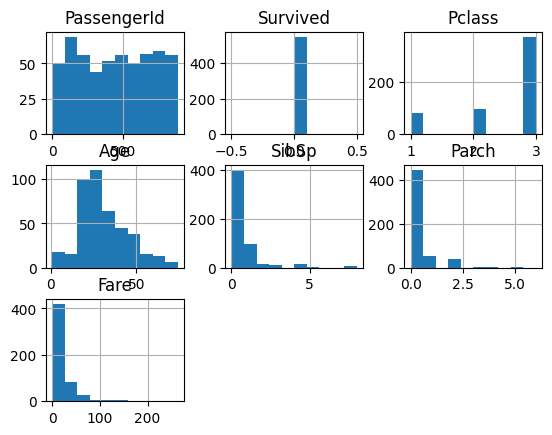

In [50]:
the_dead = df[df["Survived"] == 0]
the_dead.hist()


<Axes: xlabel='Pclass', ylabel='Survived'>

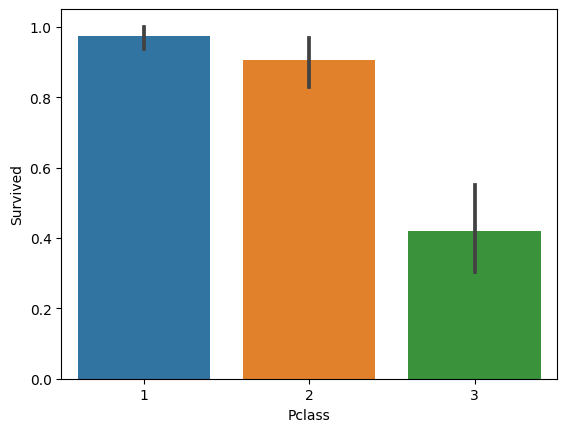

In [51]:
sn.barplot(x='Pclass', y='Survived', data=women)


<Axes: xlabel='Pclass', ylabel='Survived'>

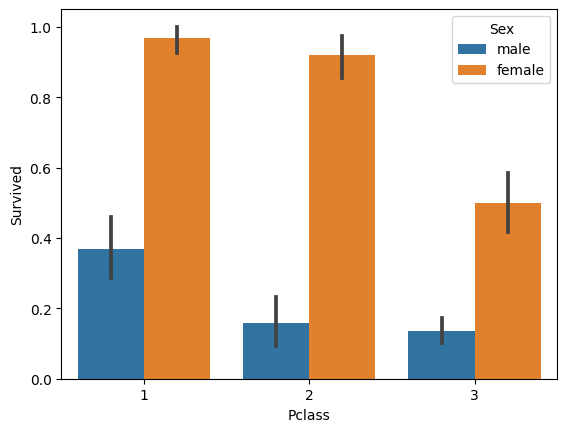

In [52]:
sn.barplot(x='Pclass', y='Survived', hue="Sex", data=df)


<Axes: xlabel='Sex', ylabel='Survived'>

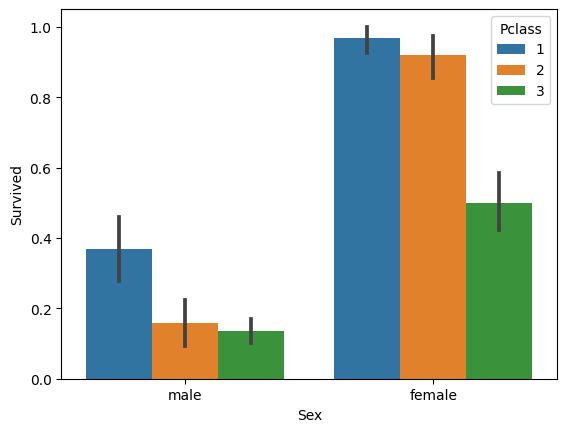

In [53]:
sn.barplot(x='Sex', y='Survived', hue="Pclass", data=df)
